<a href="https://colab.research.google.com/github/ma2sevich222/study_projects/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ygfrom google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['urban_1.jpeg', 'urban_7.jpeg', 'urban_8.jpeg', 'urban_6.jpeg', 'urban_9.jpeg', 'urban_12.jpeg', 'urban_3.jpeg', 'urban_11.jpeg', 'urban_2.jpeg', 'urban_4.jpeg', 'urban_14.jpeg', 'urban_13.jpeg', 'urban_24.jpeg', 'urban_16.jpeg', 'urban_23.jpeg', 'urban_18.jpeg', 'urban_17.jpeg', 'urban_19.jpeg', 'urban_22.jpeg', 'urban_21.jpeg', 'urban_26.jpeg', 'urban_27.jpeg', 'urban_28.jpeg', 'urban_39.jpeg', 'urban_32.jpeg', 'urban_29.jpg', 'urban_33.jpeg', 'urban_31.jpeg', 'urban_38.jpg', 'urban_42.jpeg', 'urban_41.jpeg', 'urban_34.jpeg', 'urban_37.jpg', 'urban_36.jpeg', 'urban_43.jpeg', 'urban_44.jpg']


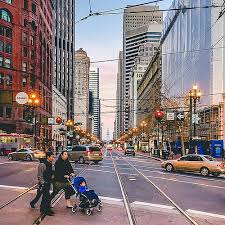

In [ ]:
import numpy as np 
import pandas as pd 

from IPython.display import display, Image
from matplotlib.pyplot import imshow
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from skimage.color import lab2rgb, rgb2lab
import glob
import os
print(os.listdir("../content/drive/My Drive/urban/train/"))
display(Image("/content/drive/My Drive/urban/train/urban_11.jpeg", width=225))


In [ ]:
xTrain=[]
yTrain=[]

In [ ]:
for filename in glob.glob('/content/drive/My Drive/urban/train/*.jpeg'):
  image = img_to_array(load_img(filename, target_size=(200,200))) / 255
  lab_image = rgb2lab(image)
  lab_image_norm = (lab_image + [0, 128, 128]) / [100, 255, 255]
  X = lab_image_norm[:,:,0]
  Y = lab_image_norm[:,:,1:]
  X = X.reshape(X.shape[0], X.shape[1], 1)
  Y = Y.reshape(Y.shape[0], Y.shape[1], 2)
  xTrain.append(X)
  yTrain.append(Y)


In [ ]:
print(np.array(xTrain).shape)

(33, 200, 200, 1)


In [ ]:
print(np.array(yTrain).shape)

(33, 200, 200, 2)


In [ ]:
xTrain=np.array(xTrain)
yTrain=np.array(yTrain)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(200,200, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3,3), activation='tanh', padding='same'))


model.compile(optimizer='rmsprop', loss='mse')
model.fit(xTrain, yTrain, batch_size=1, epochs=100, verbose=1)

Epoch 1/100
33/33 [==============================] - 3s 102ms/step - loss: 0.0381
Epoch 2/100
33/33 [==============================] - 3s 84ms/step - loss: 0.0117
Epoch 3/100
33/33 [==============================] - 3s 84ms/step - loss: 0.0101
Epoch 4/100
33/33 [==============================] - 3s 83ms/step - loss: 0.0076
Epoch 5/100
33/33 [==============================] - 3s 84ms/step - loss: 0.0067
Epoch 6/100
33/33 [==============================] - 3s 84ms/step - loss: 0.0055
Epoch 7/100
33/33 [==============================] - 3s 84ms/step - loss: 0.0054
Epoch 8/100
33/33 [==============================] - 3s 83ms/step - loss: 0.0044
Epoch 9/100
33/33 [==============================] - 3s 81ms/step - loss: 0.0045
Epoch 10/100
33/33 [==============================] - 3s 83ms/step - loss: 0.0036
Epoch 11/100
33/33 [==============================] - 3s 84ms/step - loss: 0.0032
Epoch 12/100
33/33 [==============================] - 3s 84ms/step - loss: 0.0041
Epoch 13/100
33/33 [====

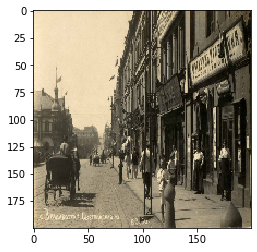

In [ ]:
image = img_to_array(load_img('/content/drive/My Drive/oldvladivostok.jpg', target_size=(200,200))) / 255
image.shape
imshow(image)


In [ ]:
lab_image = rgb2lab(image)
lab_image_norm = (lab_image + [0, 128, 128]) / [100, 255, 255]
vl= lab_image_norm[:,:,0]
vl= vl.reshape(1, vl.shape[0], vl.shape[1], 1)

In [ ]:
output = model.predict(vl)
cur = np.zeros((200, 200, 3))
cur[:,:,0] = vl[0][:,:,0]
cur[:,:,1:] = output[0]

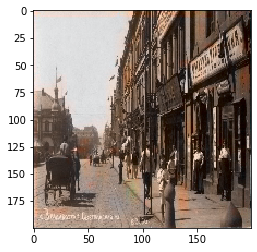

In [ ]:
cur = (cur * [100, 255, 255]) - [0, 128, 128]
rgb_image = lab2rgb(cur)
imshow(rgb_image)

Обучающие данные:фотографии улиц различных городов.
Проверочная картинка:фотография старого Владивостока